In [2]:
from radarsim.simulation import TrackingSimulation
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [106]:
sim = TrackingSimulation(
    n_max=20,
    save=True,
    beamwidth=0.05,
    variance=100,
    traj_idx=1
)

In [112]:
sim.reset()
d = False
R = 0
while(not d):
    _, r, d, _ = sim.step(100)
    R += r
    if d:
        print('Done')
        print('Last reward: {}'.format(r))
        print('Cumulative reward: {}'.format(R))
        break

Done
Last reward: -500
Cumulative reward: -500.85


In [113]:
sim.tracking_saver.to_array()
sim.computer_saver.to_array()
sim.radar_saver.to_array()

In [114]:
x = sim.tracking_saver.x_prior.squeeze(2)
z = sim.computer_saver.z

<IPython.core.display.Javascript object>


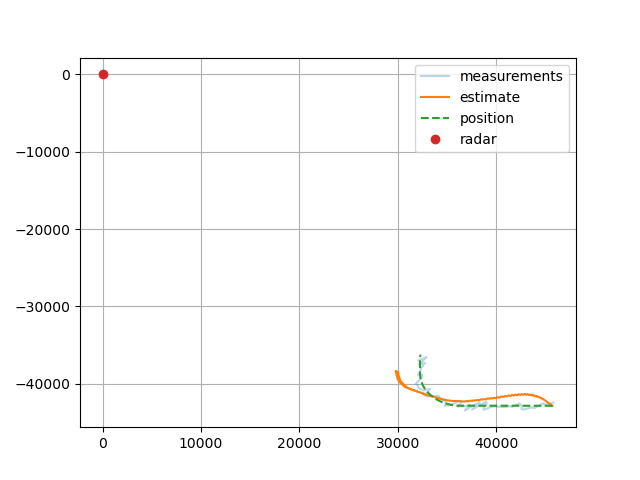

In [115]:
plt.figure()
plt.plot(z[:, 0], z[:, 1], alpha=0.3, label='measurements')
plt.plot(x[:, 0], x[:, 2], '-', label='estimate')
plt.plot(sim.target.trajectory[:len(x)+100, 0], sim.target.trajectory[:len(x)+100, 2], '--', label='position')
plt.plot(0, 0, 'o', label='radar')
plt.legend()
plt.grid(True)

<IPython.core.display.Javascript object>


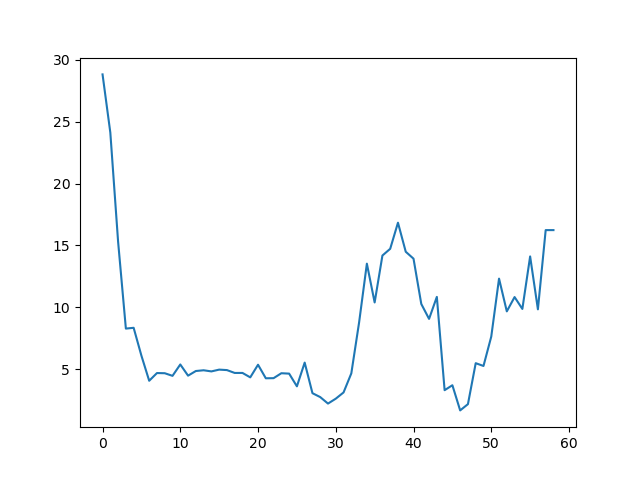

In [116]:
plt.figure()
plt.plot(np.linalg.norm(sim.computer_saver.yn, axis=1))

<IPython.core.display.Javascript object>


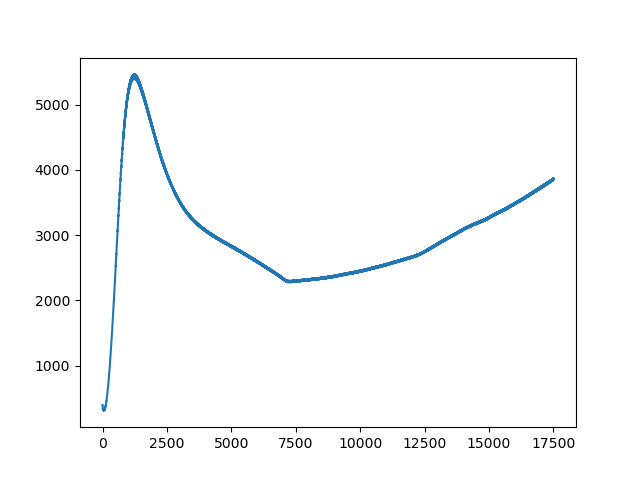

In [79]:
plt.figure()
plt.plot([np.trace(P_prior) for P_prior in sim.tracking_saver.P_prior])

<IPython.core.display.Javascript object>


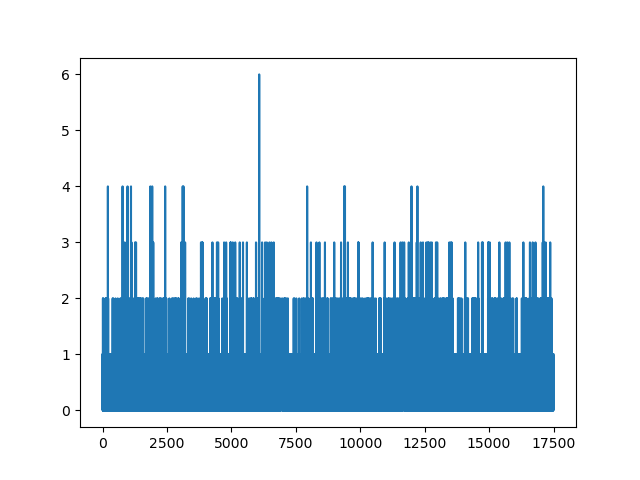

In [56]:
plt.figure()
plt.plot(sim.computer_saver.n_missed)
plt.show()

<IPython.core.display.Javascript object>


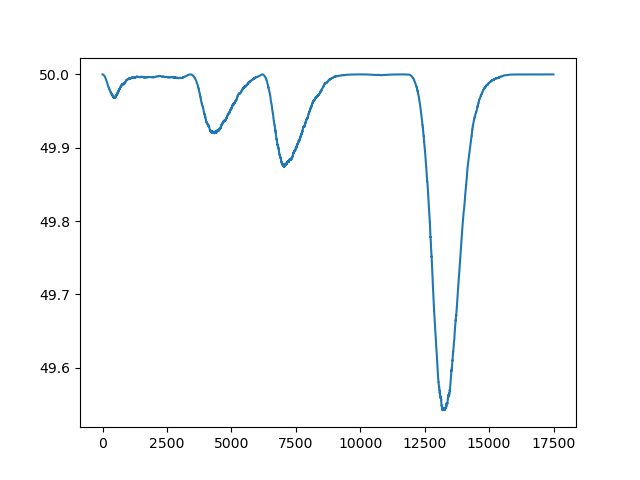

In [57]:
plt.figure()
plt.plot(sim.radar_saver.snr)

In [58]:
from radarsim.radar.radar_2d import detection_probability

In [59]:
pd = np.array([detection_probability(snr, sim.radar.pfa) for snr in sim.radar_saver.snr])

<IPython.core.display.Javascript object>


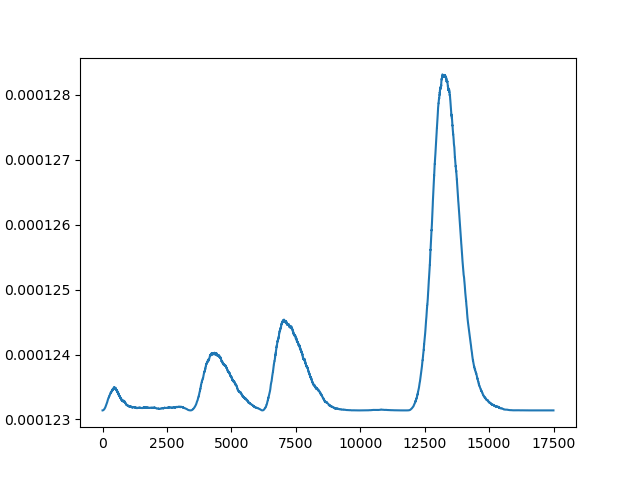

In [60]:
p_loss = (1-pd)**5
plt.figure()
plt.plot(p_loss)

In [3]:
from stable_baselines import PPO2


C:\Users\pegep\Anaconda3\envs\thesis_env\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pegep\Anaconda3\envs\thesis_env\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pegep\Anaconda3\envs\thesis_env\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pegep\Anaconda3\envs\thesis_env\lib\site-packages

In [5]:

model = PPO2('MlpPolicy', 'CartPole-v1').learn(10000)